In [47]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import statsmodels.api as sm

In [48]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Paulo\Documents\GitHub\CD_projeto3\Projeto-3


In [49]:
def minimos_quadrados(x,y):
    
    x = sm.add_constant(x)
    est = sm.OLS(y, x)
    est = est.fit()

    X_prime = np.linspace(Data_Total.Label.min(), Data_Total.Label.max(), 1000)[:, np.newaxis]
    X_prime = sm.add_constant(X_prime)  # add constant as we did before
    y_hat = est.predict(X_prime)
    summary = est.summary()
    
    return X_prime,y_hat,summary

In [50]:
label = pd.read_excel('label.xlsx') #Taxa de população economicamente ativa
government = pd.read_excel('government.xlsx') #Per capita government expenditure on health at average exchange rate (US$)
expenditure = pd.read_excel('expenditure.xlsx') #Expenditure per student, primary (% of GDP per capita)

# Todos os dados são referentes ao ano de 2007

In [51]:
label.head()


,Paises,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,1998,1999,2000,2001,2002,2003,2004,2005,2006,year
0,Afghanistan,29.900000,29.700001,29.500000,29.400000,29.200001,29.000000,28.900000,28.799999,28.600000,...,27.000000,27.000000,27.000000,27.100000,27.299999,27.600000,27.900000,28.200001,28.500000,28.299999
1,Albania,67.099998,66.599998,66.300003,66.000000,65.599998,65.800003,65.500000,66.099998,66.800003,...,50.200001,50.299999,50.200001,50.200001,50.200001,50.099998,50.000000,49.900002,49.700001,50.000000
2,Algeria,19.000000,19.100000,19.200001,19.299999,19.400000,19.500000,20.200001,20.799999,21.600000,...,29.500000,30.299999,31.200001,32.099998,32.900002,33.599998,34.299999,35.000000,35.599998,36.900002
3,Angola,72.500000,72.599998,72.699997,72.900002,73.000000,73.099998,73.199997,73.300003,74.000000,...,73.099998,73.300003,73.000000,73.000000,73.300003,73.199997,73.500000,73.800003,74.300003,74.500000
4,Argentina,29.100000,28.500000,28.000000,27.600000,27.799999,28.100000,28.200001,28.200001,28.700001,...,43.599998,44.400002,45.099998,45.900002,46.599998,47.400002,48.099998,48.900002,49.599998,49.700001


In [52]:
government.head()


,Paises,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,year,2008,2009,2010
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.832643,1.250118,1.614160,2.525066,2.813779,3.503426,3.744613,3.908887,4.390408
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,13.940591,17.062074,14.164771,18.625848,28.139706,27.160512,30.509619,32.549902,40.609457,63.935601,71.356600,75.552514,88.762634,109.074284,106.893745,94.023613
4,Algeria,46.771460,47.960053,49.738400,48.670547,45.543825,45.911114,52.509423,54.078381,62.637209,63.229395,69.295636,81.679706,108.904747,147.820706,143.160577,138.840923


In [53]:
expenditure.head()

,Paises,1998,1999,2000,2001,2002,2003,2004,2005,2006,year,2008,2009,2010,2011
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,NaN,NaN,NaN,NaN,7.77695,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Algeria,NaN,11.97508,9.73686,10.05919,10.78967,11.32475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,NaN,NaN,NaN,NaN,9.12879,9.71622,9.95121,9.41827,12.03954,12.08287,NaN,15.21899,NaN,NaN


In [54]:
Data_Total = pd.DataFrame()
desemprego_dados = list(label.Paises)
government_list = []
expenditure_list = []
filtered_list = []

government_indices = []
label_indices = []
expenditure_indices = []

label_num = []
government_num = []
expenditure_num = []

for element in range(len(expenditure.Paises)):    
    if expenditure.Paises[element] in desemprego_dados:
        expenditure_list.append(expenditure.Paises[element])
        expenditure_indices.append(element)
for element in range(len(government.Paises)):    
    if government.Paises[element] in desemprego_dados:
        government_list.append(government.Paises[element]) 
        government_indices.append(element)
if len(government_list) < len(expenditure_list):
    for element in range(len(government_list)):    
        if government_list[element] in expenditure_list:
            filtered_list.append(government_list[element])  
else:
    for element in range(len(expenditure_list)):    
        if expenditure_list[element] in government_list:
            filtered_list.append(expenditure_list[element])

for element in filtered_list:    
    label_indices.append(desemprego_dados.index(element))
    
for element in range(len(filtered_list)):    
    label_num.append(label.year[label_indices[element]])     

for element in range(len(filtered_list)):    
    government_num.append(government.year[government_indices[element]])  

for element in range(len(filtered_list)):    
    expenditure_num.append(expenditure.year[expenditure_indices[element]])      

Data_Total["Paises"] = filtered_list  
Data_Total["Label"] = label_num  
Data_Total["Government"] = government_num        
Data_Total["Expenditure"] = expenditure_num

Data_Total= Data_Total[~np.isnan(Data_Total.Label)]
Data_Total= Data_Total[~np.isnan(Data_Total.Government)]
Data_Total= Data_Total[~np.isnan(Data_Total.Expenditure)]

Data_Total.head()

,Paises,Label,Government,Expenditure
4,Argentina,49.700001,333.859695,14.63957
6,Australia,57.400002,2670.987968,16.40764
7,Austria,52.299999,3517.034374,22.98922
11,Bangladesh,57.200001,47.405185,10.31254
14,Belgium,45.700001,3065.374217,20.49624


NameError: name 'sm1' is not defined

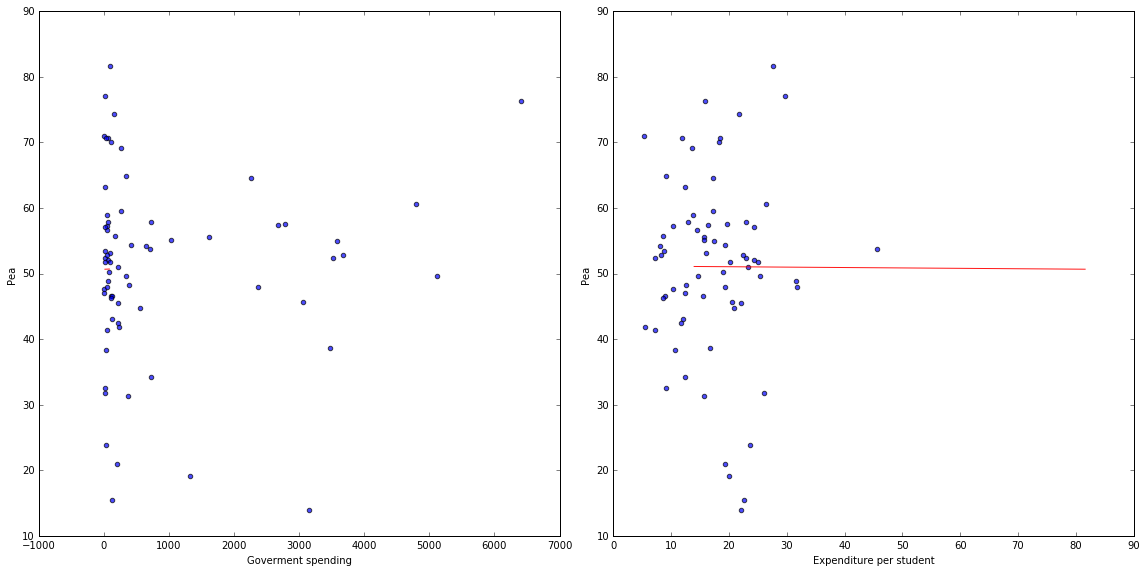

In [62]:
f, ax = plt.subplots(1,2,figsize=(16,8))
ax[0].scatter(Data_Total.Government, Data_Total.Label, alpha=0.7)  # Plot the raw data
ax[0].set_xlabel("Goverment spending")
ax[0].set_ylabel("Pea")

y = Data_Total.Label #variavel resposta
x = Data_Total.Government


X_prime,y_hat,summary_G = minimos_quadrados(x,y)
ax[0].plot(X_prime[:, 1], y_hat, 'r', alpha=0.9) 

ax[1].scatter(Data_Total.Expenditure, Data_Total.Label, alpha=0.7)  # Plot the raw data
ax[1].set_xlabel("Expenditure per student")
ax[1].set_ylabel("Pea")


x = Data_Total.Expenditure
X_prime,y_hat,summary_E = minimos_quadrados(x,y)
ax[1].plot(X_prime[:, 1], y_hat, 'r', alpha=0.9) 

plt.tight_layout(1)





In [63]:
x=Data_Total.iloc[:,(2,3)]

X=sm1.add_constant(X)  # Adds a constant term to the predictor
X.head()

model=sm1.OLS(y, X)
fit=model.fit()
fit.summary()

NameError: name 'sm1' is not defined